In [2]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

In [3]:
# Setup notebook
nbconfig = Nb.setup_notebook()

# Connect to data store
store = pd.HDFStore('../output/sra.h5', mode='r')

Please check output/fbgn2chrom.tsv. If it does not exist, run bin/fbgn2chrom.py
last updated: 2018-08-07 
Git hash: 3e6018d790e56d8ccd70647a7eccff8c120a8e6d


In [4]:
complete = store['aln/complete'].srx.unique().tolist()

In [6]:
store.root

/ (RootGroup) ''
  children := ['aln' (Group), 'ids' (Group), 'layout' (Group), 'prealn' (Group), 'strand' (Group)]

Text(0.5,1,'Strandedness')

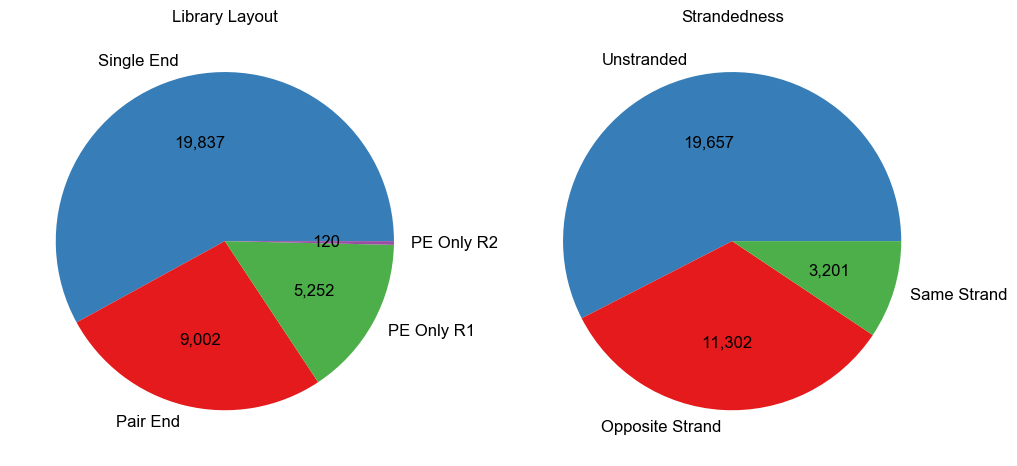

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2))

# Layout
summary = store.select('layout', where='srx == complete').value_counts()
total = summary.sum()

mapper = dict(SE='Single End', PE='Pair End', keep_R1='PE Only R1', keep_R2='PE Only R2')
summary.index = summary.index.map(mapper)

summary.plot.pie(autopct=lambda pct: '{:,.0f}'.format(np.round(pct * total / 100, 0)), textprops=dict(fontsize=12), ax=ax1)
ax1.set_aspect('equal')
ax1.set_ylabel('')
ax1.set_title('Library Layout')

# Strandedness
summary = store.select('strand', where='srx == complete').value_counts()
total = summary.sum()

mapper = dict(unstranded='Unstranded', same_strand='Same Strand', opposite_strand='Opposite Strand')
summary.index = summary.index.map(mapper)

summary.plot.pie(autopct=lambda pct: '{:,.0f}'.format(np.round(pct * total / 100, 0)), textprops=dict(fontsize=12), ax=ax2)
ax2.set_aspect('equal')
ax2.set_ylabel('')
ax2.set_title('Strandedness')

In [66]:
store.root.prealn

/prealn (Group) ''
  children := ['abi_solid' (Group), 'alignment_bad' (Group), 'analysis' (Group), 'complete' (Group), 'download_bad' (Group), 'merge_passed' (Group), 'qc_passed' (Group), 'quality_scores_bad' (Group), 'queue' (Group), 'workflow' (Group)]

In [78]:
store.root.prealn.workflow.hisat2

/prealn/workflow/hisat2 (Group) ''
  children := ['table' (Table)]

/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Percent Reads Mapping')

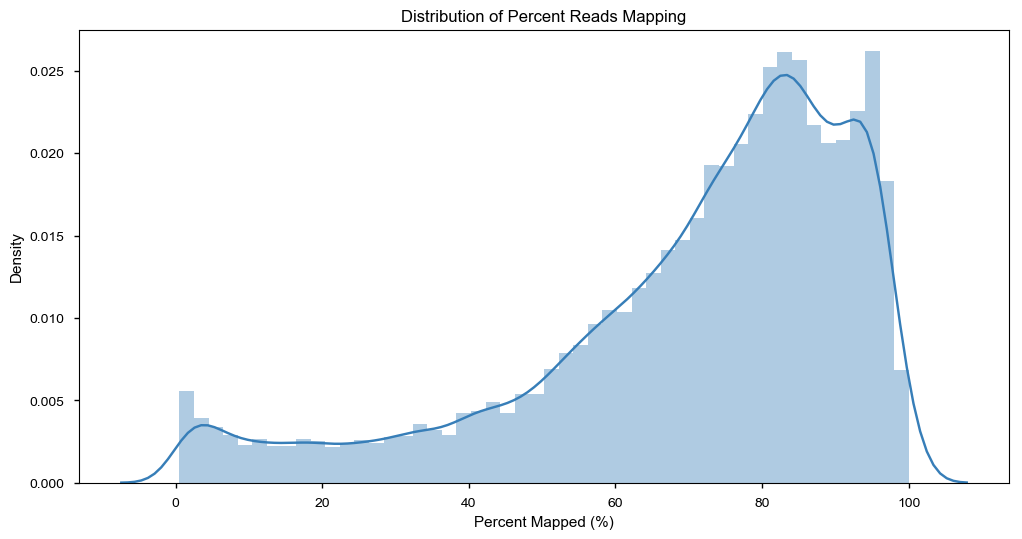

In [120]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/2))
sns.distplot(store['prealn/workflow/hisat2'].per_alignment, ax=ax)
ax.set_xlabel('Percent Mapped (%)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Percent Reads Mapping')

In [88]:
store.root.prealn.workflow.fastq

/prealn/workflow/fastq (Group) ''
  children := ['table' (Table)]

/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Library Sizes')

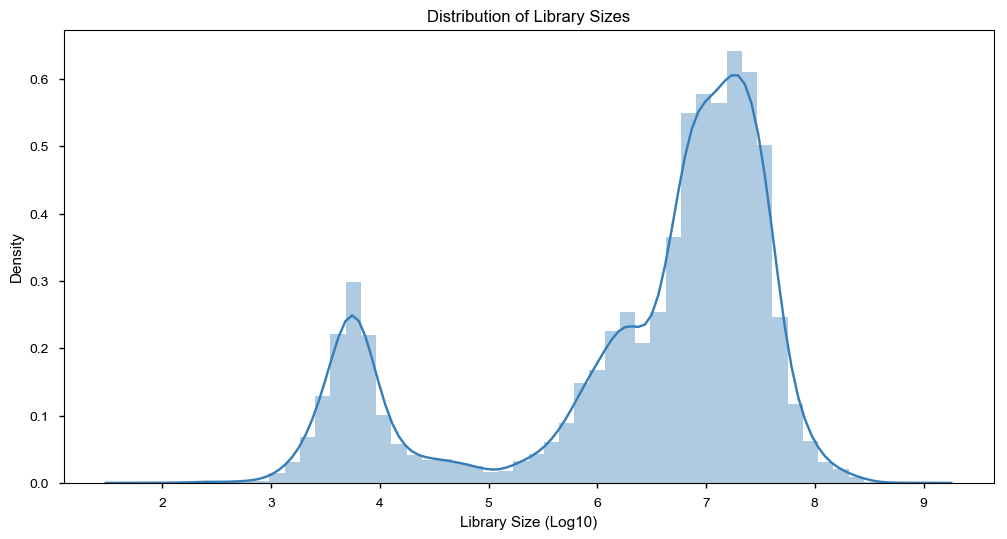

In [121]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/2))
sns.distplot(np.log10(store['prealn/workflow/fastq'][['libsize_R1', 'libsize_R2']].max(axis=1)), ax=ax)
ax.set_xlabel('Library Size (Log10)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Library Sizes')

In [124]:
store.root.prealn.workflow.markduplicates

/prealn/workflow/markduplicates (Group) ''
  children := ['table' (Table)]

In [131]:
dat = store['prealn/workflow/markduplicates'].PERCENT_DUPLICATION * 100

/home/fearjm/miniconda3/envs/ncbi_remap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Duplication Rate')

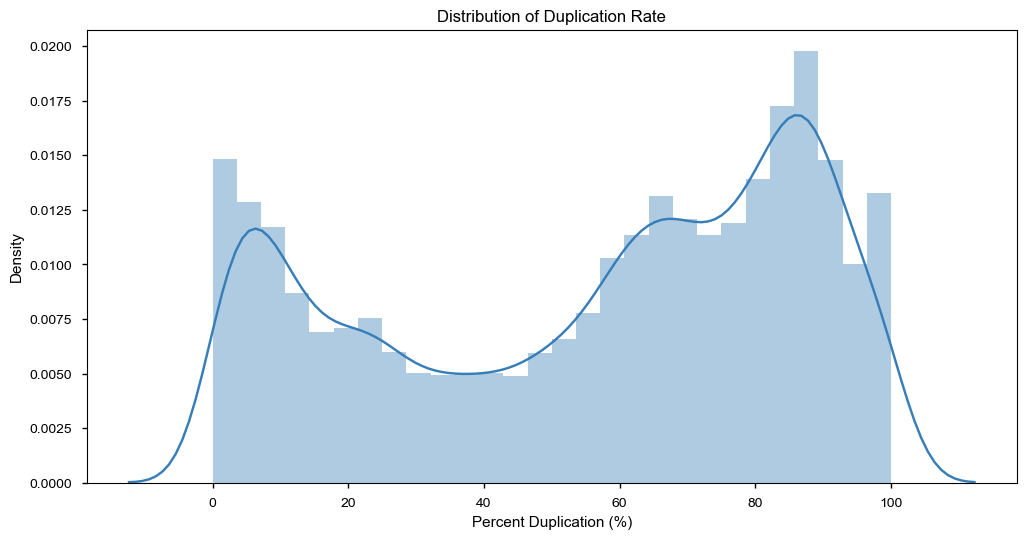

In [132]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/2))
sns.distplot(dat, ax=ax)
ax.set_xlabel('Percent Duplication (%)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Duplication Rate')

In [134]:
store['prealn/workflow/markduplicates']

,,LIBRARY,UNPAIRED_READS_EXAMINED,READ_PAIRS_EXAMINED,SECONDARY_OR_SUPPLEMENTARY_RDS,UNMAPPED_READS,UNPAIRED_READ_DUPLICATES,READ_PAIR_DUPLICATES,READ_PAIR_OPTICAL_DUPLICATES,PERCENT_DUPLICATION,ESTIMATED_LIBRARY_SIZE
srx,srr,,,,,,,,,,
SRX2255268,SRR4436103,Unknown Library,1183565,23736539,3761420,7989363,1007469,4407401,0,0.201869,55733094.0
SRX2255267,SRR4436102,Unknown Library,1086351,20891716,3769154,7912389,913603,3496121,0,0.184415,55243473.0
SRX2255266,SRR4436101,Unknown Library,1287750,25999177,4304536,7360874,1109956,4600856,0,0.193515,64510542.0
SRX2255265,SRR4436100,Unknown Library,1314091,25372436,6562931,11836549,1134333,5140022,0,0.219259,53843553.0
SRX2255264,SRR4436099,Unknown Library,1169167,24649146,3097374,6353653,989192,4554086,0,0.200077,58209294.0
SRX2255263,SRR4436098,Unknown Library,1221461,25336509,3108726,6073111,1048315,4894436,0,0.208831,56828767.0
SRX2255262,SRR4436097,Unknown Library,1024270,21233046,4103283,9320256,816674,3633721,0,0.185883,54735501.0
SRX2255261,SRR4436096,Unknown Library,1006138,19488387,3556050,8667266,810083,3122990,0,0.176477,54120412.0
SRX2255260,SRR4436095,Unknown Library,2894010,36549232,7545486,6890498,2524829,10268585,0,0.303477,52185989.0
